# Flight Data Analysis Project
### Analyzing Flight Patterns and KPIs
In this notebook, we will explore the flight dataset obtained from Goibibo, performing data cleaning, analysis, and visualization to derive insights on flight patterns.


In [1]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("goibibo_flights_data.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [4]:
# Checking data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


## Data Cleaning
In this section, we will clean the dataset by handling missing values, correcting data types, and removing any irrelevant columns.


In [5]:
# Dropping the coulum with 0 values
data.drop(columns = ['Unnamed: 11', 'Unnamed: 12'], inplace=True)

#### Converting data type and changing format for better analysis

In [6]:
# Coverting price to numeric type and replacing comma in between
data['price']=data['price'].replace('[,]', '', regex=True).astype(float)

In [7]:
# Replcing h and m from duration colums for easy calculation
import re

# Use regex to extract hours and minutes
data['duration'] = data['duration'].apply(lambda x: int(float(re.search(r'(\d*\.?\d*)h', x).group(1)) * 60) if 'h' in x else 0
                                          + int(re.search(r'(\d+)m', x).group(1)) if 'm' in x else 0)

In [8]:
# Remove hyphens from the 'stops' column
data['stops'] = data['stops'].str.replace('-', ' ', regex=False)
data['stops'] = data['stops'].str.replace('non stop', '0', regex=False)
data['stops'] = data['stops'].str.replace('1 stop', '1', regex=False)
data['stops'] = data['stops'].str.replace('2+ stop', '2', regex=False)

# Replace 'Via' followed by any characters with an empty string
data['stops'] = data['stops'].str.replace(r'Via.*', '', regex=True)


In [9]:
# Getting cleaned unique values directly
cleaned_unique_stops = data['stops'].str.replace(r'[\n\t]', '', regex=True).unique()

# Displaying the cleaned unique values
print(cleaned_unique_stops)

['0' '1' '2']


In [10]:
# Convering dep_time and arr_time to datetime format
data['dep_time'] = pd.to_datetime(data['dep_time'], format='%H:%M').dt.time
data['arr_time'] = pd.to_datetime(data['arr_time'], format='%H:%M').dt.time

In [11]:
# Converting flight date to datetime Format
data['flight date'] = pd.to_datetime(data['flight date'], format='%d-%m-%Y')

In [12]:
# Remove leading and trailing whitespace from all string columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str).str.strip() 

In [13]:
# Checking for null values
data.isnull().sum()*100

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   flight_num   300261 non-null  object        
 3   class        300261 non-null  object        
 4   from         300261 non-null  object        
 5   dep_time     300261 non-null  object        
 6   to           300261 non-null  object        
 7   arr_time     300261 non-null  object        
 8   duration     300261 non-null  int64         
 9   price        300261 non-null  float64       
 10  stops        300261 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 25.2+ MB


In [15]:
data.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,120,6013.0,0
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,120,6013.0,0
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,120,6016.0,0
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,120,6015.0,0
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,120,6015.0,0


#### Now data is being cleaned and ready for analysis

## Key Performance Indicators
We will calculate important KPIs to evaluate flight performance and trends.


#### KPI 1: Average Flight Price by Airline

In [16]:
# Calculating average Flight Price by Airline
avg_price = data.groupby(['airline', 'class'])['price'].mean().reset_index()
avg_price.columns = ['Airline', 'Class', 'Average Price']
avg_price

,Airline,Class,Average Price
0,Air India,business,47837.996322
1,Air India,economy,7386.886866
2,AirAsia,economy,4132.026525
3,GO FIRST,economy,5708.459464
4,Indigo,economy,5377.492092
5,SpiceJet,economy,6241.051826
6,StarAir,economy,4982.016393
7,Trujet,economy,3277.097561
8,Vistara,business,56309.203502
9,Vistara,economy,7885.024454


#### KPI 2: Average Duration of Flights

In [17]:
# Calculating average Duration of Flights
avg_duration = data['duration'].mean()
print(f'Average Flight Duration: {avg_duration} minutes')

Average Flight Duration: 706.5385214863069 minutes


#### KPI 4: Flight Count by Airline

In [18]:
# Calculating flight Count by Airline
flight_count = data['airline'].value_counts().reset_index()
flight_count.columns = ['Airline', 'Flight Count']
flight_count

,Airline,Flight Count
0,Vistara,127859
1,Air India,80894
2,Indigo,43120
3,GO FIRST,23177
4,AirAsia,16098
5,SpiceJet,9011
6,StarAir,61
7,Trujet,41


#### KPI 5: Flight Frequency

In [19]:
# Calculating flight Frequency
flight_frequency = data.groupby(['from', 'to'])['flight_num'].count()
flight_frequency

from       to       
Bangalore  Chennai       6410
           Delhi        13756
           Hyderabad     8971
           Kolkata      10029
           Mumbai       12940
Chennai    Bangalore     6493
           Delhi         9783
           Hyderabad     6103
           Kolkata       6983
           Mumbai        9338
Delhi      Bangalore    14012
           Chennai      10780
           Hyderabad     9328
           Kolkata      11934
           Mumbai       15291
Hyderabad  Bangalore     7898
           Chennai       6395
           Delhi         8507
           Kolkata       7987
           Mumbai       10073
Kolkata    Bangalore     9824
           Chennai       6653
           Delhi        10506
           Hyderabad     7897
           Mumbai       11467
Mumbai     Bangalore    12885
           Chennai      10130
           Delhi        14809
           Hyderabad    10477
           Kolkata      12602
Name: flight_num, dtype: int64

#### KPI 6: Average Number of Stops

In [20]:
# Converting the 'stops' column to numeric
data['stops'] = pd.to_numeric(data['stops'], errors='coerce')

# Calculating average number of stops for each airline
average_stops_per_airline = data.groupby('airline')['stops'].mean()
average_stops_per_airline

airline
Air India    0.963780
AirAsia      0.988322
GO FIRST     0.878500
Indigo       0.757004
SpiceJet     0.726778
StarAir      0.344262
Trujet       1.000000
Vistara      0.969951
Name: stops, dtype: float64

## Exploratory Data Analysis
We will perform EDA to understand the distribution of flight durations, prices, and the number of stops.


In [21]:
# Summary statistics
data.describe()

,flight date,duration,price,stops
count,300261,300261.000000,300261.000000,300261.000000
mean,2023-07-21 00:06:26.447790592,706.538521,21174.363371,0.924213
min,2023-06-26 00:00:00,0.000000,1116.000000,0.000000
25%,2023-07-10 00:00:00,360.000000,4831.000000,1.000000
50%,2023-07-21 00:00:00,660.000000,7499.000000,1.000000
75%,2023-08-02 00:00:00,960.000000,43159.000000,1.000000
max,2023-08-13 00:00:00,2940.000000,124917.000000,2.000000
std,NaN,431.956458,23048.497726,0.398188


#### Price distribution

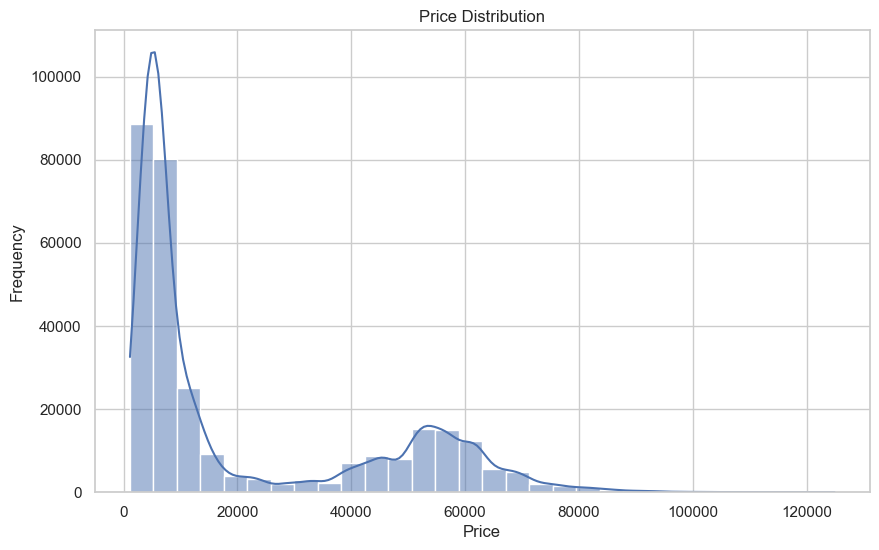

In [22]:
# Set the style
sns.set(style="whitegrid")

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Number of Flights operated per Airline (Jun 23 - Aug 23)

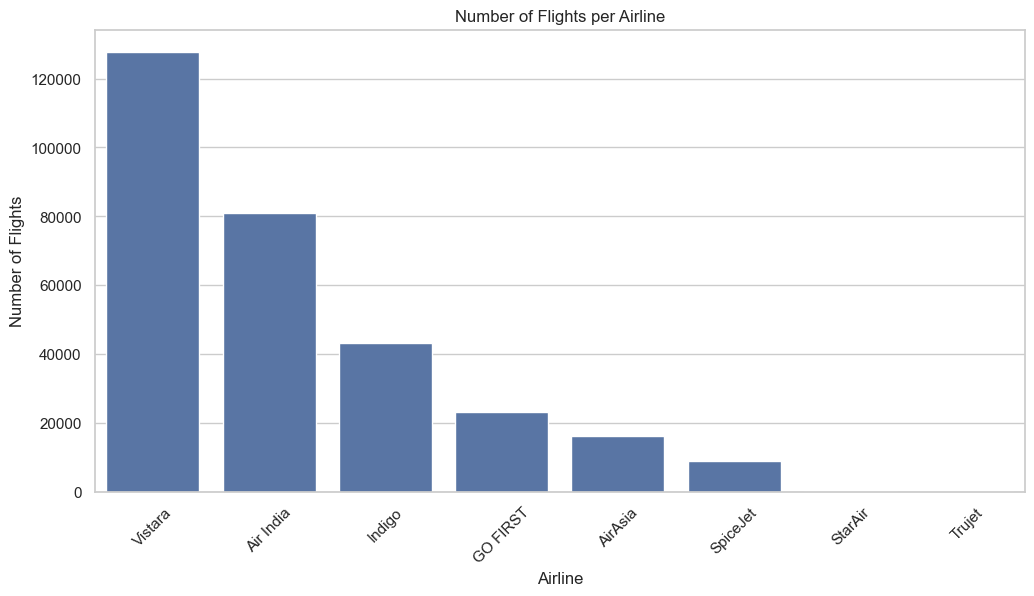

In [23]:
# Count of flights per airline
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='airline', order=data['airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

#### Number of Flights by Class

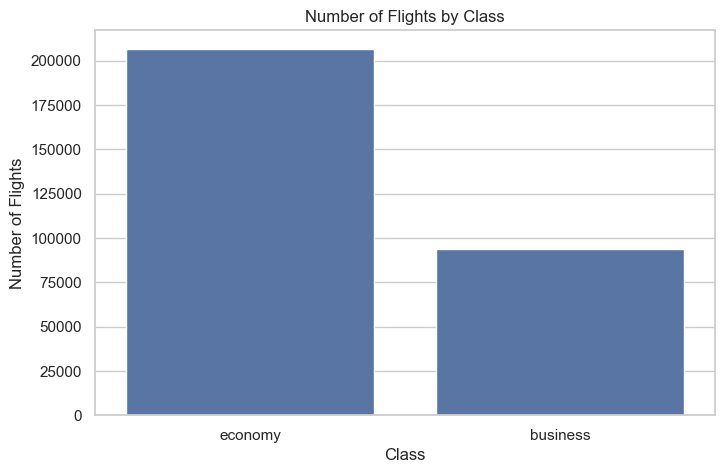

In [24]:
# Count of flights by class
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='class')
plt.title('Number of Flights by Class')
plt.xlabel('Class')
plt.ylabel('Number of Flights')
plt.show()

#### Number of Flights Over Time

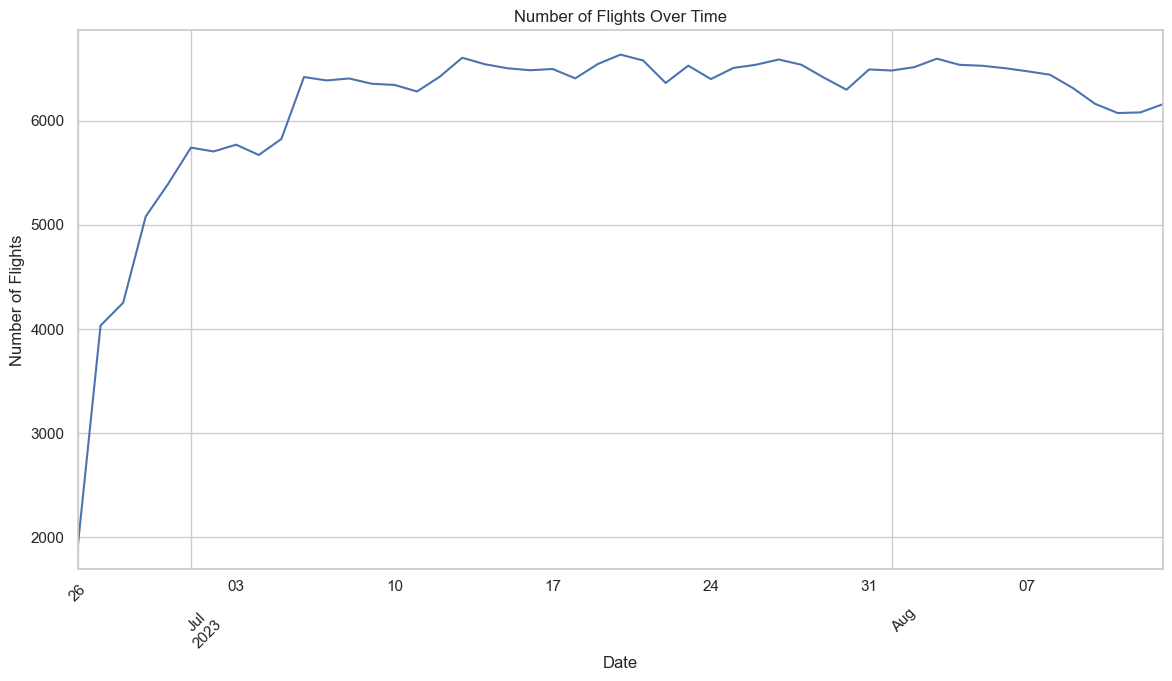

In [25]:
# Count of flights per date
flights_per_date = data['flight date'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
flights_per_date.plot(kind='line')
plt.title('Number of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

#### Average Price per Airline

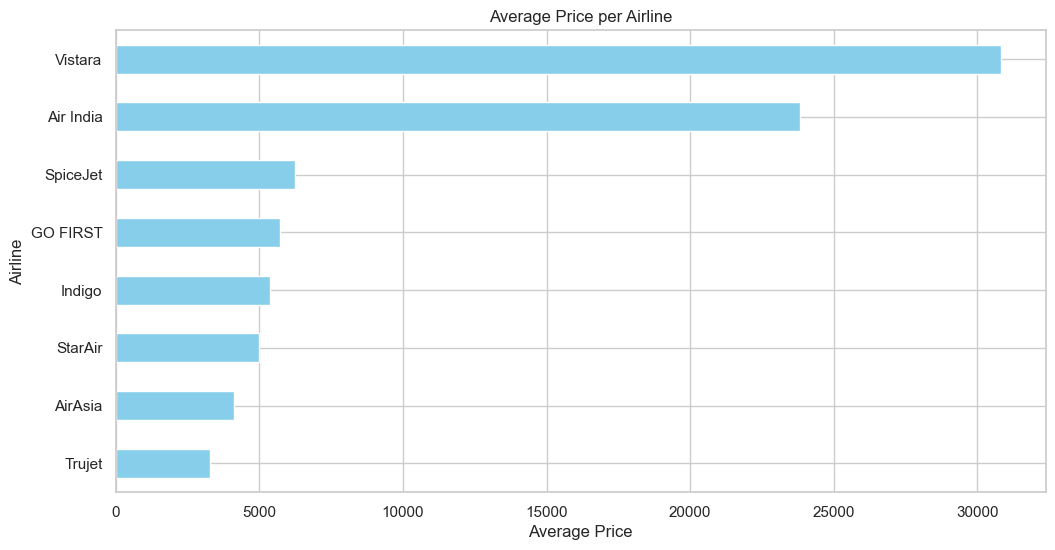

In [26]:
# Average price by airline
average_price_airline = data.groupby('airline')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
average_price_airline.plot(kind='barh', color='skyblue')
plt.title('Average Price per Airline')
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.show()

#### Average Price by Class

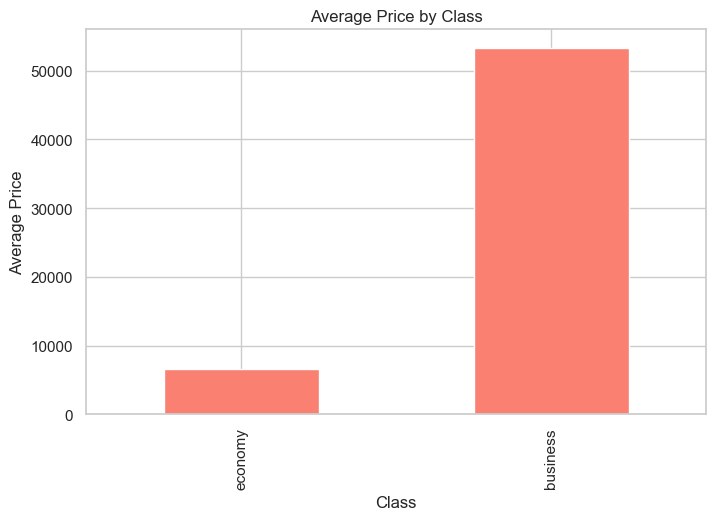

In [27]:
# Average price by class
average_price_class = data.groupby('class')['price'].mean().sort_values()
plt.figure(figsize=(8, 5))
average_price_class.plot(kind='bar', color='salmon')
plt.title('Average Price by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()

#### Number of Stops Distribution

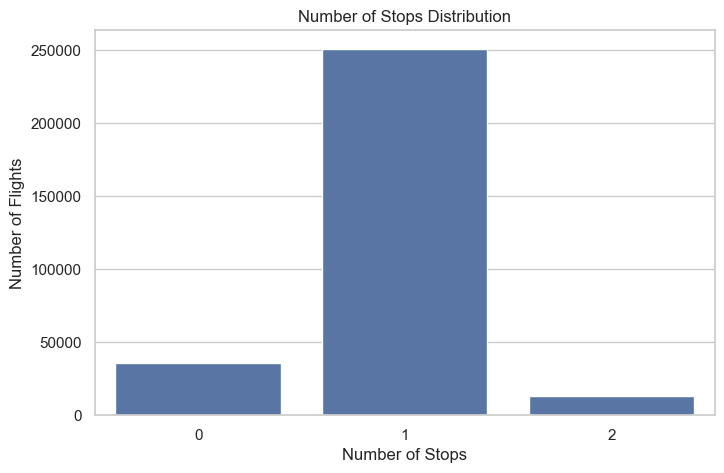

In [28]:
# Count of flights by number of stops
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='stops')
plt.title('Number of Stops Distribution')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Flights')
plt.show()


## Summary of Flight Data Analysis

1. Price Distribution: The analysis revealed that the majority of flights (over 100,000 occurrences) are priced below ₹10,000, indicating a strong preference for budget-friendly options among travelers.
    
2. Flight Operations by Airline: Vistara emerged as the airline with the highest number of flights operated, exceeding 120,000 flights. It is followed by Air India and Indigo, highlighting Vistara's significant presence in the market.
    
3. Class Preferences: The data indicates that Economy class is the most preferred travel option, while Business class usage is approximately half of Economy class. This suggests a strong demand for affordable travel while also showing interest in premium services.
    
4. Average Price per Airline: Vistara is identified as the most expensive airline, with an average ticket price exceeding ₹30,000. In contrast, Indigo’s average ticket price is around ₹6,000, and TruJet offers the most economical fares at less than ₹5,000, highlighting a clear price differentiation among airlines.
    
5. Flight Stop Frequency: The analysis found that most flights typically have one stop, suggesting that travelers are often willing to endure layovers for more affordable or flexible options.